# 03 — Exploratory Data Analysis (EDA): Trend Emission ASEAN (2000–2024)

Notebook ini berfokus pada eksplorasi tren emisi karbon negara ASEAN periode 2000–2024.

Tahapan utama:
- memanggil dataset hasil olahan dari folder data/process
- merapikan nama kolom agar lebih mudah dibaca
- membuat pengelompokan waktu per 4 tahun untuk melihat tren lebih stabil
- membuat visualisasi tren emisi
- menyiapkan dataset untuk analisis statistik, ranking, dan decomposition

Catatan:
- Visualisasi 4-tahunan hanya memakai grup yang lengkap agar periode parsial (mis. 2024 tunggal) tidak menimbulkan bias.
- Agregasi 4-tahunan memakai rata-rata tahunan. Interpretasi nilai adalah average annual, bukan total 4 tahun.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Data

Dataset dipanggil dari file processed lokal agar pipeline konsisten dan reproducible.
Scope divalidasi melalui daftar negara dan rentang tahun.


In [33]:
data_path = "data/process/owid_co2_asean_2000_2024.csv"
df = pd.read_csv(data_path)
df.shape
sorted(df["country"].unique().tolist()), int(df["year"].min()), int(df["year"].max())


(['Brunei',
  'Cambodia',
  'Indonesia',
  'Laos',
  'Malaysia',
  'Myanmar',
  'Philippines',
  'Singapore',
  'Thailand',
  'Vietnam'],
 2000,
 2024)

## Column Renaming

Beberapa nama kolom dirapikan agar lebih singkat dan konsisten.
Rename dilakukan tanpa mengubah makna data.


In [34]:
rename_map = {
    "co2": "co2_total",
    "coal_co2": "co2_coal",
    "oil_co2": "co2_oil",
    "gas_co2": "co2_gas",
    "cement_co2": "co2_cement",
    "flaring_co2": "co2_flaring",
}
df = df.rename(columns=rename_map)
df.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp', 'co2_cement',
       'cement_co2_per_capita', 'co2_total', 'co2_growth_abs',
       'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'co2_coal',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'co2_flaring', 'flaring_co2_per_capita', 'co2_gas',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use

## Select Core Columns

Analisis difokuskan pada variabel inti yang relevan untuk tren emisi dan decomposition sumber emisi.


In [35]:
cols = [
    "country",
    "year",
    "population",
    "co2_total",
    "co2_per_capita",
    "co2_coal",
    "co2_oil",
    "co2_gas",
    "co2_cement",
    "co2_flaring",
]
df_eda = df[cols].copy()
df_eda.shape


(250, 10)

## Time Grouping per 4 Years

Pengelompokan 4 tahun digunakan untuk mengurangi fluktuasi tahunan dan memudahkan pembacaan tren jangka menengah.
Year group di-anchor ke 2000 agar konsisten dengan scope dataset.


In [36]:
df_eda["year_group"] = 2000 + ((df_eda["year"] - 2000) // 4) * 4
df_eda[["year", "year_group"]].drop_duplicates().sort_values(["year"]).head(12)


,year,year_group
0,2000,2000
1,2001,2000
2,2002,2000
3,2003,2000
4,2004,2004
5,2005,2004
6,2006,2004
7,2007,2004
8,2008,2008
9,2009,2008


## Aggregate to 4-Year Group

Agregasi dilakukan per negara dan per 4 tahun menggunakan rata-rata tahunan.
Nilai yang dihasilkan adalah average annual pada periode tersebut.


In [37]:
group_counts = (
    df_eda.groupby(["country", "year_group"])
    .size()
    .reset_index(name="n_years")
)

df_4y = (
    df_eda.groupby(["country", "year_group"], as_index=False)
    .mean(numeric_only=True)
)

df_4y_full = df_4y.merge(group_counts, on=["country", "year_group"], how="left")
df_4y_complete = df_4y_full[df_4y_full["n_years"] == 4].copy()

df_4y_full.shape, df_4y_complete.shape


((70, 12), (60, 12))

## Trend Plot — Average Annual CO2 Total (4-Year Group)

Visualisasi tren memakai data 4-tahunan yang lengkap untuk menghindari bias periode parsial.


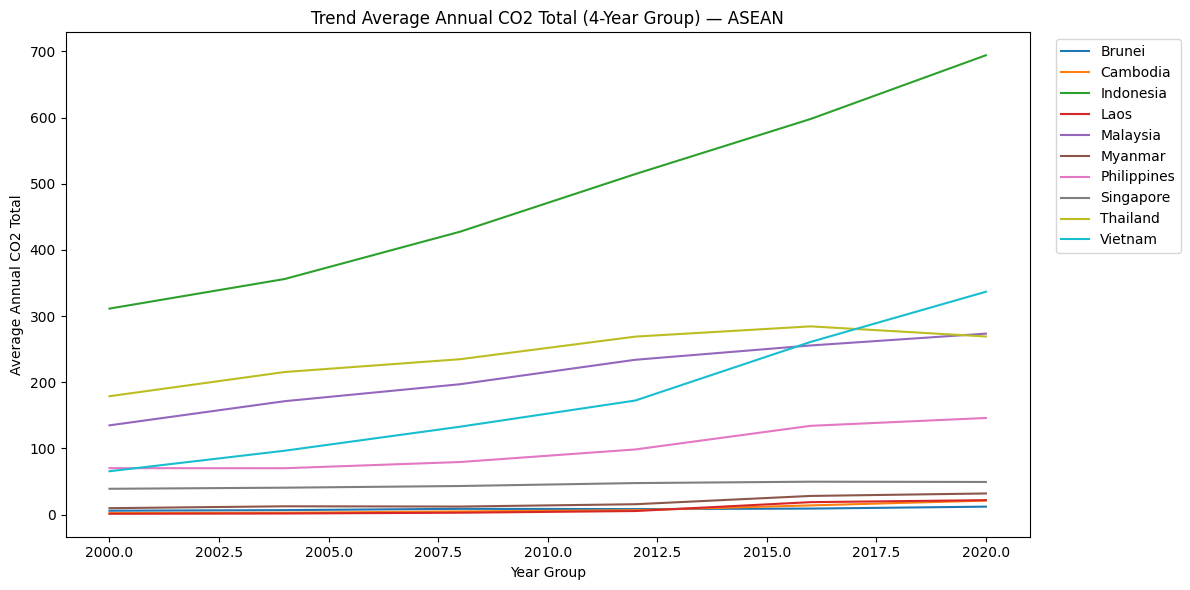

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_4y_complete, x="year_group", y="co2_total", hue="country")
plt.title("Trend Average Annual CO2 Total (4-Year Group) — ASEAN")
plt.xlabel("Year Group")
plt.ylabel("Average Annual CO2 Total")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Trend Plot — Average Annual CO2 per Capita (4-Year Group)

Emisi per kapita membantu membandingkan intensitas emisi antar negara tanpa bias skala populasi.


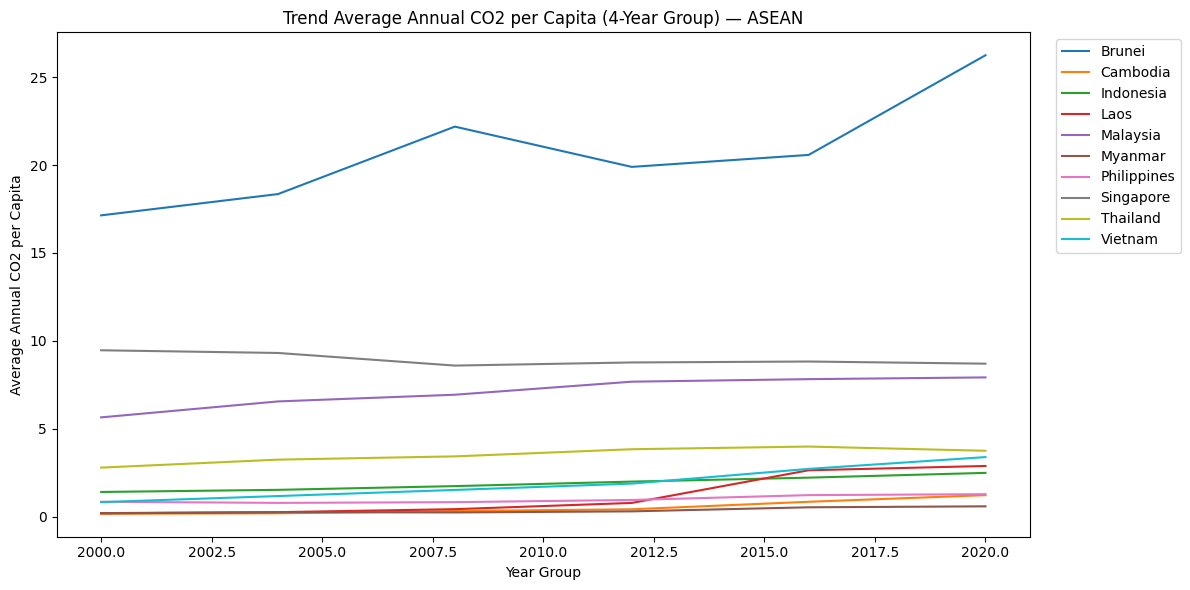

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_4y_complete, x="year_group", y="co2_per_capita", hue="country")
plt.title("Trend Average Annual CO2 per Capita (4-Year Group) — ASEAN")
plt.xlabel("Year Group")
plt.ylabel("Average Annual CO2 per Capita")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Data Preparation for Statistical Checks

Dataset statistik memakai data 4-tahunan yang lengkap.
Outlier handling menggunakan clipping IQR sebagai treatment ringan tanpa menghapus observasi.


In [40]:
cols_numeric = [
    "co2_total",
    "co2_per_capita",
    "co2_coal",
    "co2_oil",
    "co2_gas",
    "co2_cement",
    "co2_flaring",
]

df_final = df_4y_complete[["country", "year_group", "population"] + cols_numeric].copy()

Q1 = df_final[cols_numeric].quantile(0.25)
Q3 = df_final[cols_numeric].quantile(0.75)
IQR = Q3 - Q1

for col in cols_numeric:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_final[col] = df_final[col].clip(lower=lower, upper=upper)

df_final.shape


(60, 10)

## Outlier Inspection (Boxplot + Skewness)

Boxplot membantu meninjau pola nilai ekstrem pada dataset setelah clipping.
Skewness memberi indikasi distribusi yang tidak simetris.


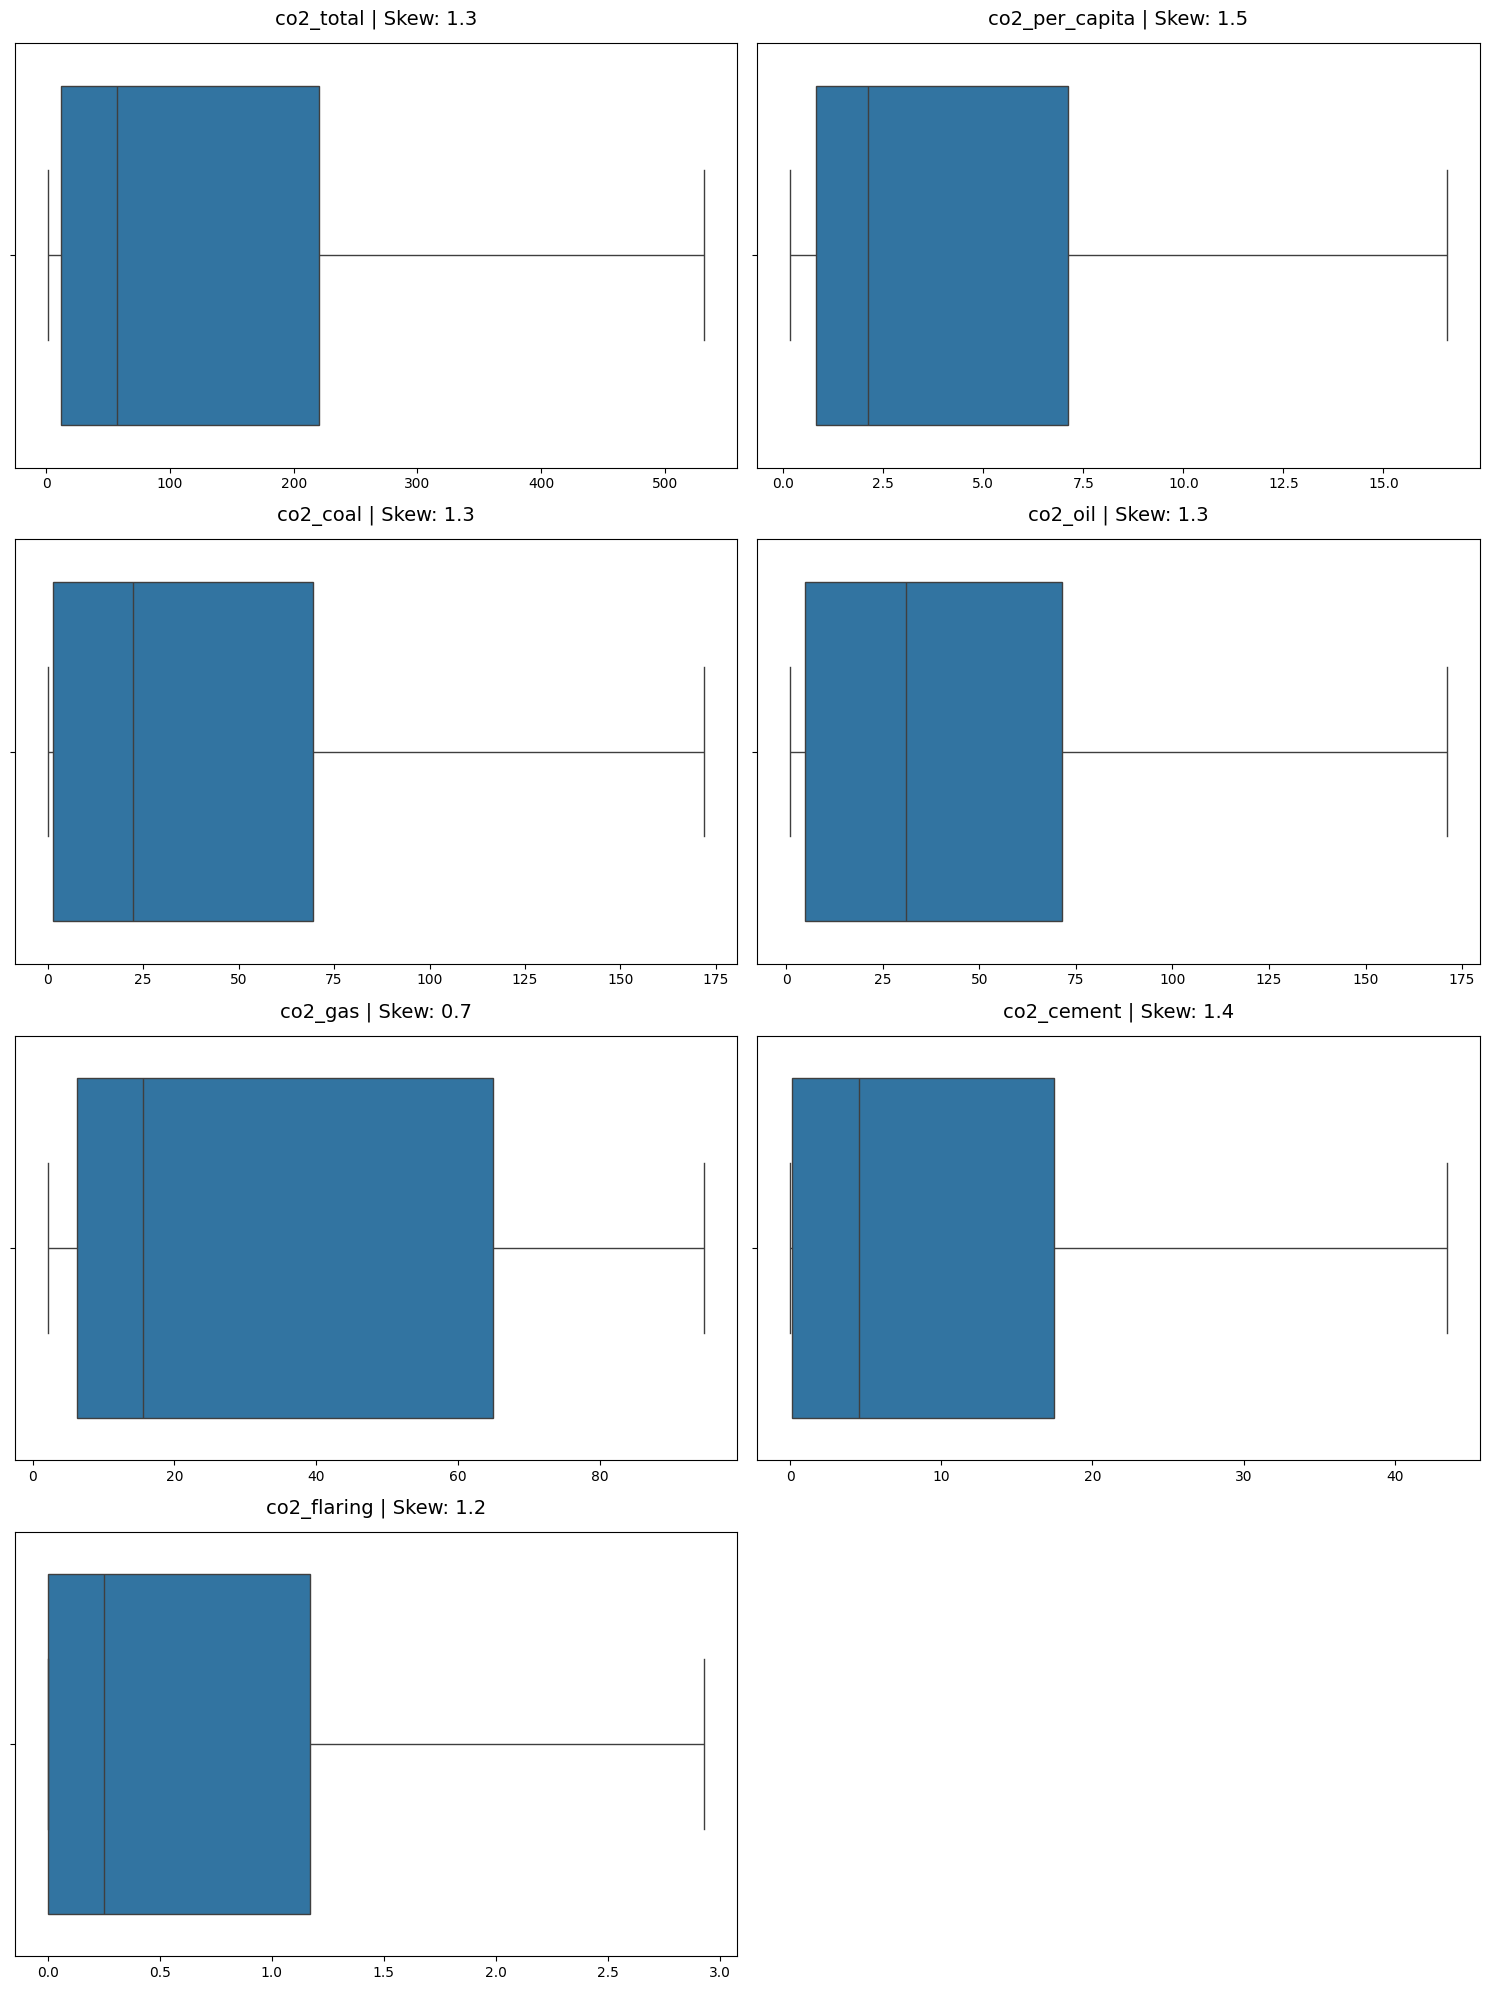

In [41]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(cols_numeric):
    sns.boxplot(x=df_final[column], ax=axes[i])
    skew_val = round(df_final[column].skew(), 1)
    axes[i].set_title(column + " | Skew: " + str(skew_val), fontsize=14, pad=13)
    axes[i].set_xlabel("")

for j in range(len(cols_numeric), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Univariate Summary

Ringkasan statistik membantu memahami pusat distribusi dan variasi antar variabel.


In [42]:
df_final[cols_numeric].describe()
df_final[cols_numeric].skew()


,0
co2_total,1.301171
co2_per_capita,1.472301
co2_coal,1.325511
co2_oil,1.263978
co2_gas,0.680141
co2_cement,1.412552
co2_flaring,1.170569


## Normality Check

Uji normalitas dipakai sebagai indikasi bentuk distribusi, bukan dasar keputusan inferensial.


In [43]:
from scipy.stats import shapiro

normality_results = {}
for col in cols_numeric:
    stat, p_value = shapiro(df_final[col].dropna())
    normality_results[col] = p_value

normality_results


{'co2_total': np.float64(2.7910601588786614e-07),
 'co2_per_capita': np.float64(1.613823605283423e-08),
 'co2_coal': np.float64(2.7187951899329396e-07),
 'co2_oil': np.float64(4.3811278980584184e-07),
 'co2_gas': np.float64(1.0086033574069932e-06),
 'co2_cement': np.float64(9.706215975687789e-08),
 'co2_flaring': np.float64(7.31482249950031e-10)}

## Correlation

Korelasi Spearman dipakai karena lebih robust terhadap distribusi skewed.
Korelasi within-country dihitung untuk mengurangi bias ukuran negara.


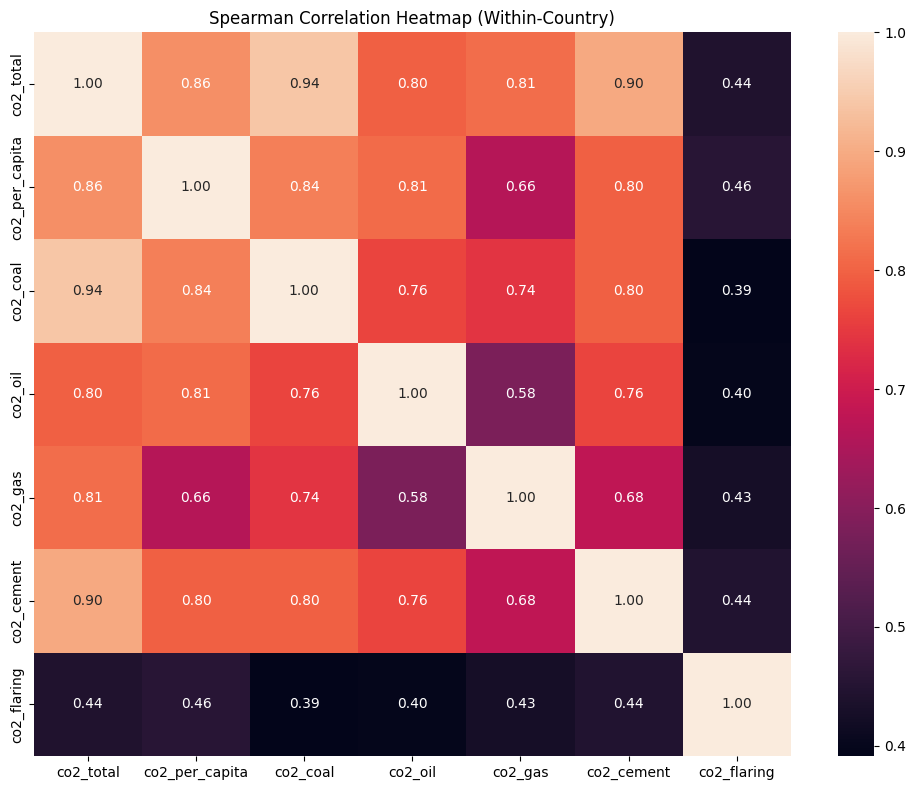

In [44]:
corr_spearman = df_final[cols_numeric].corr(method="spearman")
corr_pearson = df_final[cols_numeric].corr(method="pearson")
corr_spearman, corr_pearson

tmp = df_final[["country"] + cols_numeric].dropna().copy()

for c in cols_numeric:
    tmp[c] = tmp.groupby("country")[c].transform(lambda x: x - x.mean())

corr_within = tmp[cols_numeric].corr(method="spearman")
corr_within

plt.figure(figsize=(10, 8))
sns.heatmap(corr_within, annot=True, fmt=".2f")
plt.title("Spearman Correlation Heatmap (Within-Country)")
plt.tight_layout()
plt.show()


## Ranking: Start vs End Period (Full 4-Year Groups)

Ranking membandingkan periode awal dan akhir yang lengkap pada data 4-tahunan.


In [45]:
start_period = df_final["year_group"].min()
end_period = df_final["year_group"].max()
start_period, end_period

df_compare = df_final[df_final["year_group"].isin([start_period, end_period])].copy()

df_wide = df_compare.pivot(
    index="country",
    columns="year_group",
    values=cols_numeric
)

df_wide


co2_total            co2_per_capita             co2_coal  \
year_group        2000       2020           2000       2020      2000   
country                                                                 
Brunei         5.76725   11.90150      16.582031  16.582031       NaN   
Cambodia       2.15975   21.01075       0.169500   1.230250       NaN   
Indonesia    311.25950  532.02725       1.410250   2.496250  67.92250   
Laos           1.10150   21.70925       0.197750   2.888750   0.06925   
Malaysia     134.79750  273.41800       5.651750   7.925000  12.14100   
Myanmar        9.60000   31.82625       0.208750   0.594250   1.19000   
Philippines   70.06475  145.91750       0.853000   1.284750  15.20325   
Singapore     38.90900   49.20050       9.467250   8.706000   0.00725   
Thailand     178.84300  269.09300       2.795250   3.753000  37.26425   
Vietnam       65.42750  336.71200       0.833750   3.393000  26.28400   

                           co2_oil               co2_gas           co2_cement  \
year_group         2020       2000        2020      2000      2020       2000   
country                                                                         
Brunei         2.636500    1.39600    3.474250   4.07675   5.52125    0.00000   
Cambodia       5.906000    2.15975    9.279500       NaN       NaN    0.00000   
Indonesia    172.003187  160.04200  171.034187  58.04500  85.15525   17.42575   
Laos          14.614750    0.96475    2.689000       NaN       NaN    0.06725   
Malaysia      90.838000   60.64050   72.508750  52.29000  94.75200    6.94800   
Myanmar        3.343000    5.59350   16.765500   2.58075   8.92725    0.18125   
Philippines   75.865250   48.27100   53.991000   2.12975   6.54250    4.40725   
Singapore      1.561750   32.97800   26.725500   5.92425  20.91350    0.00000   
Thailand      70.145750   79.32750   99.350750  44.44825  78.28900   17.49950   
Vietnam      172.003187   26.72300   70.869250   3.73375  15.30250    7.46050   

                       co2_flaring            
year_group        2020        2000      2020  
country                                       
Brunei        0.000000    0.295000  0.269000  
Cambodia      5.819250    0.000000  0.006000  
Indonesia    30.163500    2.932813  2.932813  
Laos          4.405250    0.000000  0.000000  
Malaysia     11.745750    2.778250  2.932813  
Myanmar       2.757250    0.054500  0.033250  
Philippines   9.377750    0.053250  0.141250  
Singapore     0.000000    0.000000  0.000000  
Thailand     20.830000    0.303750  0.477500  
Vietnam      43.442375    1.226750  1.155250

### Ranking — Absolute Change in Average Annual CO2 Total


In [46]:
df_ranking_abs = (df_wide["co2_total"][end_period] - df_wide["co2_total"][start_period]).sort_values(ascending=False)
df_ranking_abs = df_ranking_abs.reset_index()
df_ranking_abs.columns = ["country", "co2_total_change"]
df_ranking_abs.insert(0, "no", range(1, len(df_ranking_abs) + 1))
df_ranking_abs


,no,country,co2_total_change
0,1,Vietnam,271.28450
1,2,Indonesia,220.76775
2,3,Malaysia,138.62050
3,4,Thailand,90.25000
4,5,Philippines,75.85275
5,6,Myanmar,22.22625
6,7,Laos,20.60775
7,8,Cambodia,18.85100
8,9,Singapore,10.29150
9,10,Brunei,6.13425


### Ranking — Change in Average Annual CO2 per Capita


In [47]:
df_ranking_pc = (df_wide["co2_per_capita"][end_period] - df_wide["co2_per_capita"][start_period]).sort_values(ascending=False)
df_ranking_pc = df_ranking_pc.reset_index()
df_ranking_pc.columns = ["country", "co2_pc_change"]
df_ranking_pc.insert(0, "no", range(1, len(df_ranking_pc) + 1))
df_ranking_pc


,no,country,co2_pc_change
0,1,Laos,2.69100
1,2,Vietnam,2.55925
2,3,Malaysia,2.27325
3,4,Indonesia,1.08600
4,5,Cambodia,1.06075
5,6,Thailand,0.95775
6,7,Philippines,0.43175
7,8,Myanmar,0.38550
8,9,Brunei,0.00000
9,10,Singapore,-0.76125


## Decomposition by Source

Decomposition difokuskan pada beberapa negara dengan perubahan absolut terbesar.
Cek gap antara co2_total dan jumlah komponen dilakukan agar interpretasi tidak overclaim.


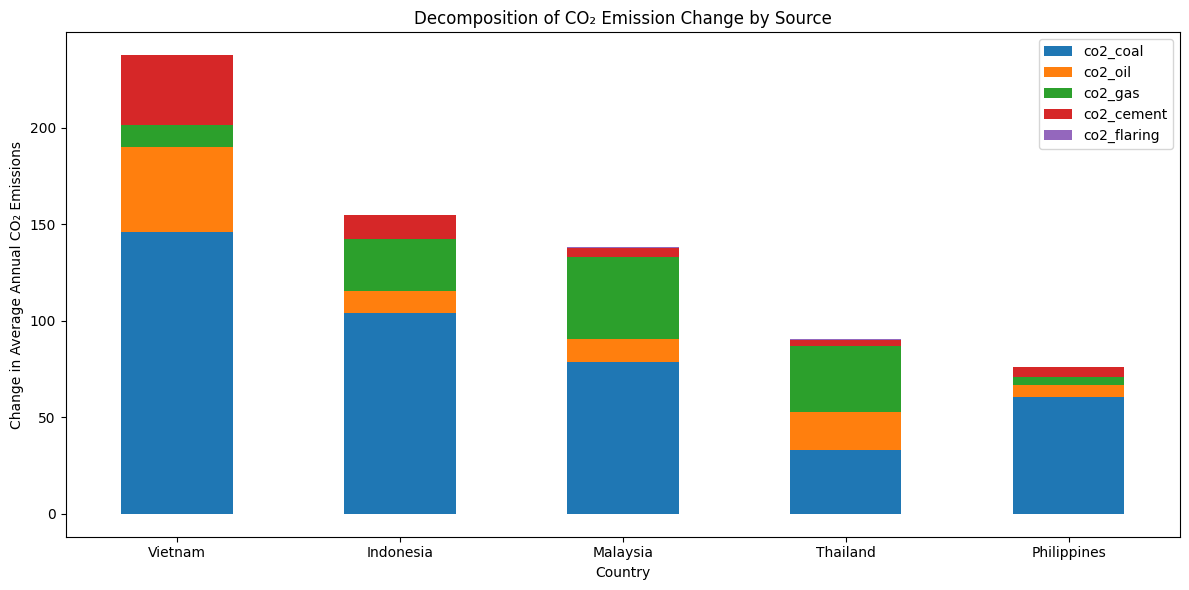

In [48]:
top_countries = df_ranking_abs["country"].head(5).tolist()

sources = ["co2_coal", "co2_oil", "co2_gas", "co2_cement", "co2_flaring"]

check = pd.DataFrame({
    "total_start": df_wide["co2_total"][start_period],
    "sum_sources_start": df_wide[sources].xs(start_period, level=1, axis=1).sum(axis=1),
    "total_end": df_wide["co2_total"][end_period],
    "sum_sources_end": df_wide[sources].xs(end_period, level=1, axis=1).sum(axis=1),
})
check["gap_start"] = check["total_start"] - check["sum_sources_start"]
check["gap_end"] = check["total_end"] - check["sum_sources_end"]

check.describe()

decomp_data = {}
for src in sources:
    decomp_data[src] = (df_wide[src][end_period] - df_wide[src][start_period]).loc[top_countries]

df_decomp = pd.DataFrame(decomp_data)
df_decomp

df_decomp.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Decomposition of CO₂ Emission Change by Source")
plt.xlabel("Country")
plt.ylabel("Change in Average Annual CO₂ Emissions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Conclusion

- Tren emisi lebih mudah dibaca saat dikelompokkan per 4 tahun.
- Agregasi 4-tahunan memakai rata-rata tahunan, sehingga perubahan yang dibaca adalah perubahan average annual antar periode.
- Distribusi variabel emisi cenderung skewed. Korelasi Spearman lebih aman untuk interpretasi hubungan antar variabel.
- Korelasi within-country membantu mengurangi bias ukuran negara.
- Ranking dan decomposition menggunakan periode 4-tahunan yang lengkap agar perbandingan start vs end tidak bias.
- Decomposition perlu memperhatikan gap antara co2_total dan jumlah komponen, sehingga hasil merepresentasikan komponen yang tersedia.
